<a href="https://colab.research.google.com/github/geocarvalho/r-bioinfo-ds/blob/master/statquest/machine-learning/07_ROC_and_AUC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 07 - [ROC and AUC in R](https://www.youtube.com/watch?v=qcvAqAH60Yw&list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF&index=7)

### 1. Draw a simple **ROC** graph;
### 2. Extract thresholds for a specific region in the **ROC**;
### 3. Draw and compute a *Partial Area Under the Curve*;
### 4. Layer two **ROC** graphs so that they can be easily compared.

* Load in the pROC library, it'll draw ROC graphs

In [1]:
install.packages('pROC')
library(pROC)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Type 'citation("pROC")' for a citation.

Attaching package: ‘pROC’

The following objects are masked from ‘package:stats’:

    cov, smooth, var



* We're also going to use the **randomForest** package to classigy samples and we can change the threshold that we use to make those decisions

In [3]:
install.packages('randomForest')
library(randomForest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


* Since we're going to generate an example dataset, let's set the seed for the random number generator so that we can reproduce our results

In [0]:
set.seed(420)

* This example dataset will be just like the one we used in th **ROC** and **AUC** class, only this one will habe 100 samples instead of just 8

In [0]:
num.samples <- 100
# Create 100 measurements
weight <- sort(rnorm(n=num.samples, mean=172, sd=29))

* We do this by using the `rnorm()` function to generate 100 random values from a normal distribution with the mean set to 172 and the standard deviation set to 29 and then we use the `sort()` function to sort the numbers from low to high

* Let's classify an individual as obese or not obese

In [0]:
obese <- ifelse(test=(runif(
  n=num.samples) < (rank(weight)/100)),yes=1, no=0)

* The way we're going to classify a sample as obese is to start by using the `rank()` function to rank the weights, from lightest to heaviest;
> The *lightest* sample will have **rank=1** and the *heaviest* sample will have **rank=100**

* Then we scale the ranks by **100**;
> This means the *lightest* sample will = **1/100** = **0.01**, and the *heaviest* sample will = **100/100** = **1**

* Then we compare the scaled ranks to random numbers between **0** and **1** and if the random number is *smaller* than the scaled rank, then the individual is classified as ***obese***, otherwise it's classified as ***not obese***;

* The "if smaller then ***obese***, otherwise ***not obese***" is performed by the `ifelse()` function.

In [9]:
print(obese)

  [1] 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0
 [38] 0 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1
 [75] 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


* The lighter samples are mostly **0**s (***not obese***) and the heavier samples are mostly **1**s (***obese***)
* Let's plot the data

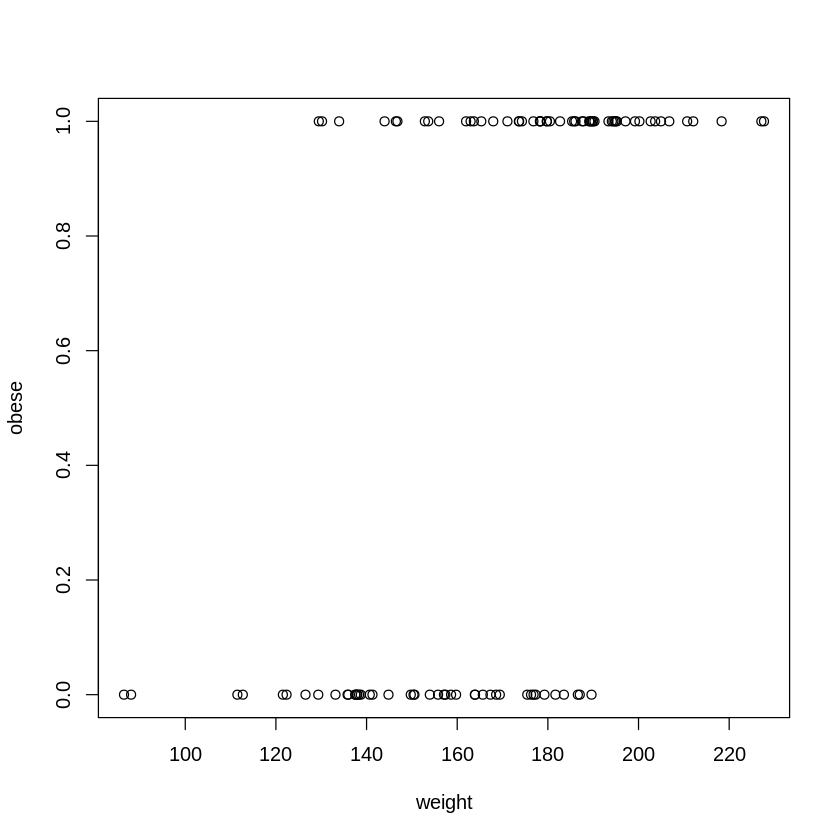

In [10]:
plot(x=weight, y=obese)

* Now we'll use the `glm()` function to fit a logistic regression curve to the data ([video about it](https://www.youtube.com/watch?v=C4N3_XJJ-jU)).


In [0]:
glm.fit=glm(obese ~ weight, family=binomial)

* Now pass **weight** and the **fitted.values** stored in **glm.fit** into the `lines()` function to draw a curve that tells us the predicted probability that an individual is ***obese*** or ***not obese***.

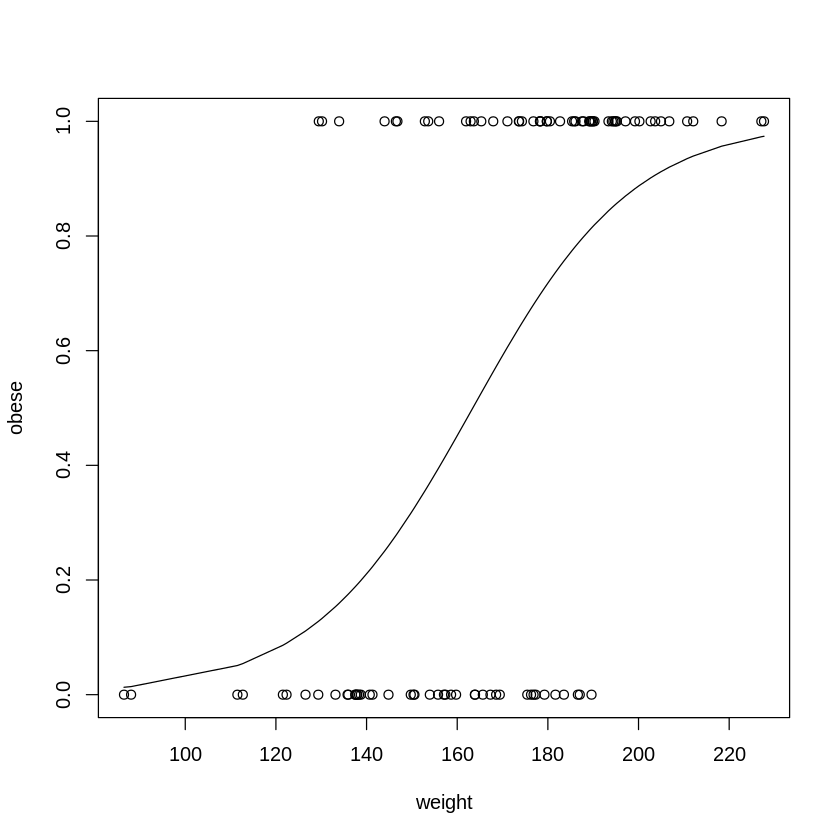

In [13]:
plot(x=weight, y=obese)
lines(weight, glm.fit$fitted.values)

* The **glm.fit$fitted.values** contains the y-axis coordinates along the curve for each sample. In other words, it contains estimated probabilities that each sample is ***obese***.

* We'll use the known classifications and the estimated probabilities to draw an **ROC** curve

* We use the `roc()` function from the **pROC** library to draw the **ROC** graph.
> We pass in the known classifications, ***obese*** or ***not obese***, for each sample and the estimated probabilities that each sample is ***obese*** and we tell the `roc()` function to draw the graph, not just calculate all of the numbers used to draw the graph.

Setting levels: control = 0, case = 1
Setting direction: controls < cases



Call:
roc.default(response = obese, predictor = glm.fit$fitted.values,     plot = TRUE)

Data: glm.fit$fitted.values in 45 controls (obese 0) < 55 cases (obese 1).
Area under the curve: 0.8291

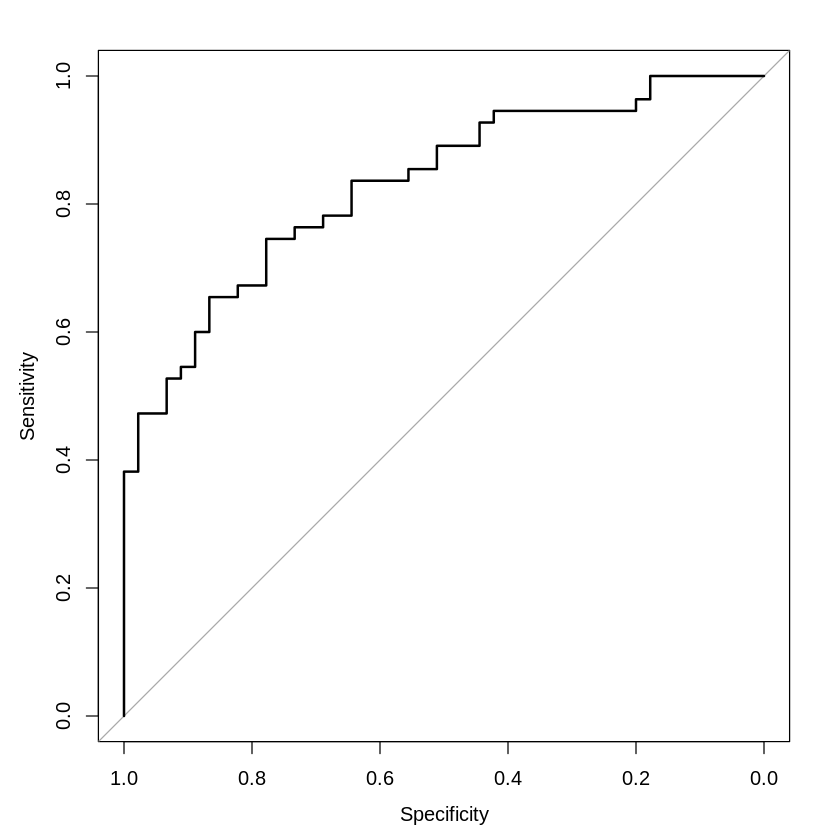

In [17]:
roc(obese, glm.fit$fitted.values, plot=TRUE)
# par(pty='s') just for Rstudio, to muck around with the
# graphics parameters
# we set pty (the plot type) to 's' (square)

* `Call:` just echos what you typed in, and isn't interesting;
*  `Data:` tells us how many samples were ***not obese*** (0) and how many were ***obese*** (1);
* `Area under the curve:` tells us the **AUC** (*0.8291*).

* By default, the `roc()` function plots **Specifiicity** on the x-axis instead of **1 - Specificity**. As result, the x-axis goes from **1** (left side) to **0** (right side). To change it, add the parameter `legacy.axes=TRUE` to the function

Setting levels: control = 0, case = 1
Setting direction: controls < cases



Call:
roc.default(response = obese, predictor = glm.fit$fitted.values,     plot = TRUE, legacy.axes = TRUE)

Data: glm.fit$fitted.values in 45 controls (obese 0) < 55 cases (obese 1).
Area under the curve: 0.8291

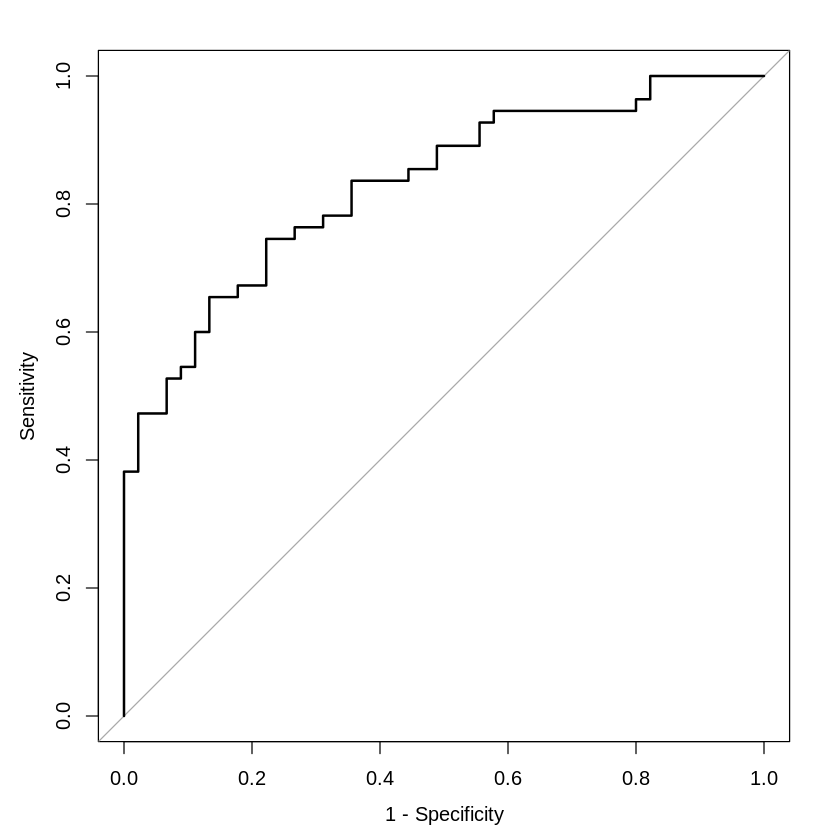

In [18]:
roc(obese, glm.fit$fitted.values, plot=TRUE, legacy.axes=TRUE )

* To clarify the graph about **Sensitivity** and **Specificity**:
> Set `percent=TRUE` so that the axes are in percentages, rather than values between 0 and 1;

> Label the x-axis and y-axis;

> Change the color of the **ROC** curve, making it thicker.

Setting levels: control = 0, case = 1
Setting direction: controls < cases



Call:
roc.default(response = obese, predictor = glm.fit$fitted.values,     percent = TRUE, plot = TRUE, legacy.axes = TRUE, xlab = "FP percentage",     ylab = "TP percentage", col = "#377eb8", lwd = 4)

Data: glm.fit$fitted.values in 45 controls (obese 0) < 55 cases (obese 1).
Area under the curve: 82.91%

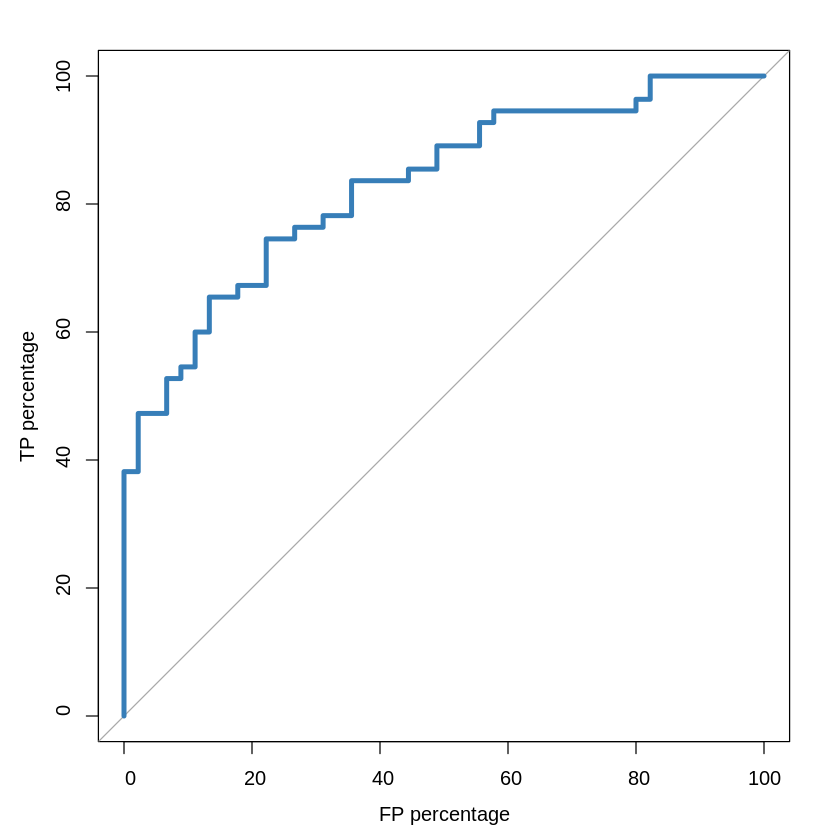

In [20]:
roc(obese, glm.fit$fitted.values, plot=TRUE, legacy.axes=TRUE,
   percent=TRUE, xlab='FP percentage', ylab='TP percentage',
   col='#377eb8', lwd=4)

* Now, imagine we're interested in the range of thresholds that resulted in a specific of the **ROC** curve;
* We can access those thresholds by saving the calculations into a variable and then make a **data.frane** that contains all of the **TP percentages**, by multiplying the **Sensitivities** by **100** and the **FP percentages**, by multiplying **1-Specificities** by **100** and last the **thresholds**.

Setting levels: control = 0, case = 1
Setting direction: controls < cases


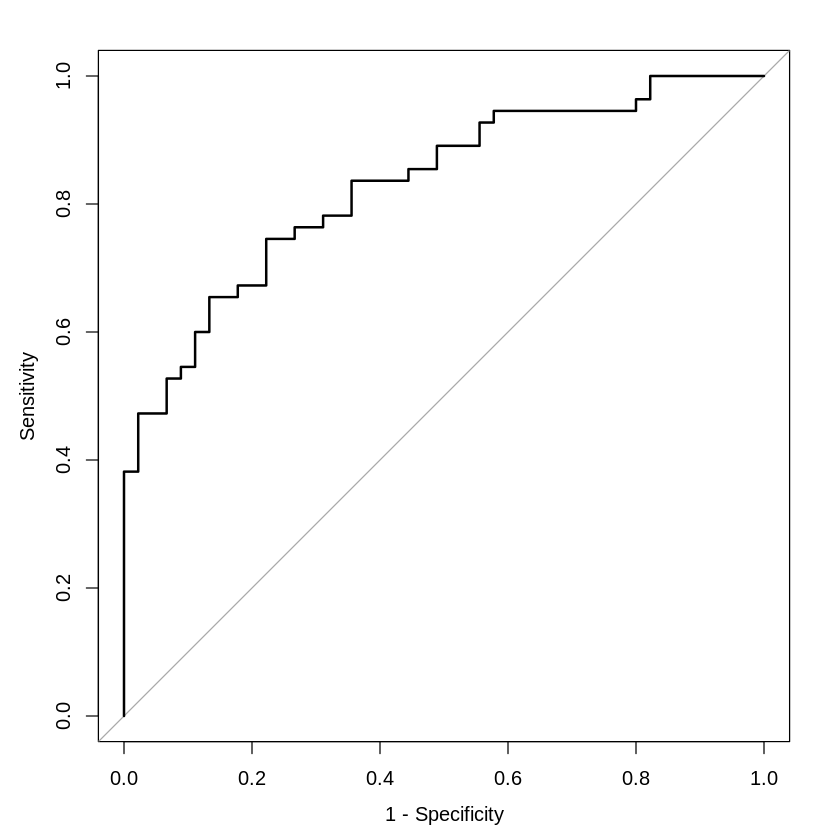

In [23]:
roc.info <- roc(obese, glm.fit$fitted.values, plot=TRUE, legacy.axes=TRUE)
roc.df <- data.frame(
tpp=roc.info$sensitivities*100,
fpp=(1-roc.info$specificities)*100,
thresholds=roc.info$thresholds)

In [24]:
head(roc.df)

tpp,fpp,thresholds
<dbl>,<dbl>,<dbl>
100,100.00000,-Inf
100,97.77778,0.01349011
100,95.55556,0.03245008
100,93.33333,0.05250145
100,91.11111,0.07017225
100,88.88889,0.08798755


* We see that when the threshold is set to **negative infinity**, so that every single sample is called **obese** then the **TPP** (**TP porcentage**), is **100** because all of the ***obese*** sample were correctly classified and the **FPP** (**FP percentage**), is also **100** because all of the samples that were **not obese** were *incorrectly* classified.

* So the first row in **roc.df** corresponds to the upper right-hand corner of the **ROC** curve.

In [25]:
tail(roc.df)

,tpp,fpp,thresholds
,<dbl>,<dbl>,<dbl>
96,9.090909,0,0.9275222
97,7.272727,0,0.9371857
98,5.454545,0,0.9480358
99,3.636364,0,0.9648800
100,1.818182,0,0.9735257
101,0.000000,0,Inf


* We see that when the threshold is set to positive infinity, so that every single sample is classified ***not obese*** then the **TPP** and **FPP** are both  **0** because none of the samples that were classified,  wither *correctly* or  *incorrectly*, obese.

* So the last row in **roc.df** corresponds to the bottom left-hand corner of the **ROC** curve.

* Now we can isolate the **TPP**, the **FPP** and the **thresholds** used when the **TP rate** is between **60** and **80**.

In [26]:
roc.df[roc.df$tpp > 60 & roc.df$tpp < 80,]

,tpp,fpp,thresholds
,<dbl>,<dbl>,<dbl>
42,78.18182,35.55556,0.5049310
43,78.18182,33.33333,0.5067116
44,78.18182,31.11111,0.5166680
45,76.36364,31.11111,0.5287933
46,76.36364,28.88889,0.5429351
47,76.36364,26.66667,0.5589494
48,74.54545,26.66667,0.5676342
49,74.54545,24.44444,0.5776086
50,74.54545,22.22222,0.5946054


* If we were interested in choosing a threshold in this range, we could pick the one that had the optimal balance of **TP** and **FP**.

* Now let's go back to talking about customizing what the `roc()` function draws.

* If we want to print the **AUC** directly on the graph, just add the parameter `print.auc=TRUE` to the `roc()` function

Setting levels: control = 0, case = 1
Setting direction: controls < cases



Call:
roc.default(response = obese, predictor = glm.fit$fitted.values,     percent = TRUE, plot = TRUE, legacy.axes = TRUE, xlab = "FP percentage",     ylab = "TP percentage", col = "#377eb8", lwd = 4, print.auc = TRUE)

Data: glm.fit$fitted.values in 45 controls (obese 0) < 55 cases (obese 1).
Area under the curve: 82.91%

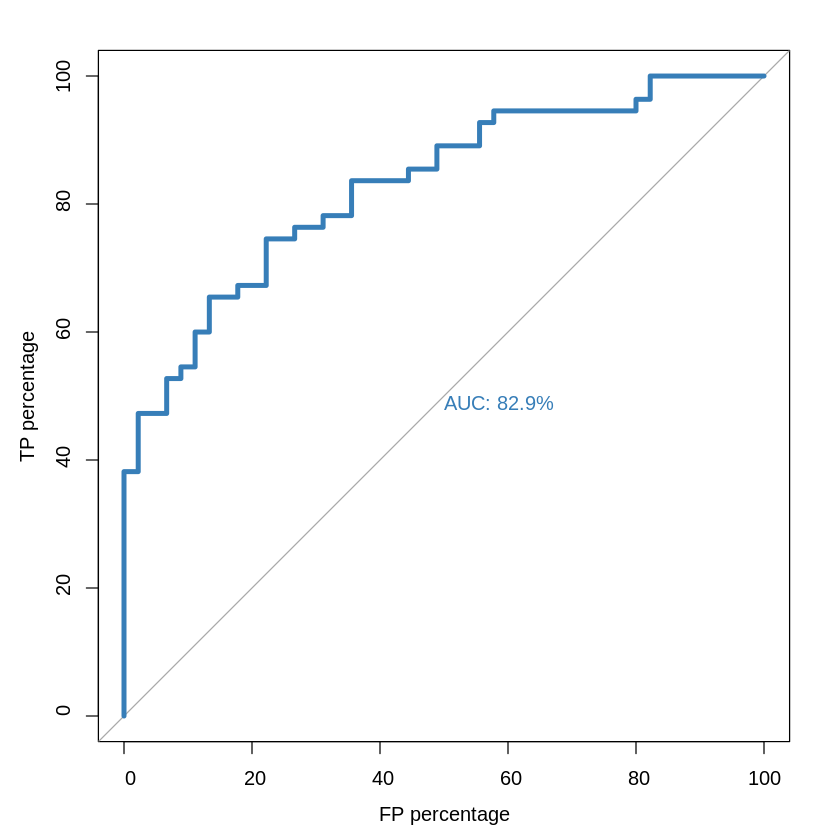

In [27]:
roc(obese, glm.fit$fitted.values, plot=TRUE, legacy.axes=TRUE,
   percent=TRUE, xlab='FP percentage', ylab='TP percentage',
   col='#377eb8', lwd=4, print.auc=TRUE)

* You can also draw and calculate a partial **AUC**. 
> These are useful when you want to focus on the part of the **ROC** curve that only allows for a small number of **FP**.

* After adding the parameter `print.auc=TRUE`, we then specify where along the x-axis you want the **AUC** to be printed, otherwise the text might overlap something important (`print.auc.x=45`). Then we set the parameter `partial.auc=c(100, 90)` to the range of **Specificity** values that we want to focus on.

> The range of values is in terms of **Specificity**, not **1-Specificity**. So **100% Specificity** corresponds to **0%** on our **1-Specificity** axis and **90% Specificity** corresponds to **10%** on our **1-Specificity** axis.

* Then we draw the partial **AUC** by setting `auc.polygon=TRUE` and to specify the polygon's color `auc.polygon.col="#377eb822"`

Setting levels: control = 0, case = 1
Setting direction: controls < cases



Call:
roc.default(response = obese, predictor = glm.fit$fitted.values,     percent = TRUE, plot = TRUE, legacy.axes = TRUE, xlab = "FP percentage",     ylab = "TP percentage", col = "#377eb8", lwd = 4, print.auc = TRUE,     print.auc.x = 45, partial.auc = c(100, 90), auc.polygon = TRUE,     auc.polygon.col = "#377eb822")

Data: glm.fit$fitted.values in 45 controls (obese 0) < 55 cases (obese 1).
Partial area under the curve (specificity 100%-90%): 4.727%

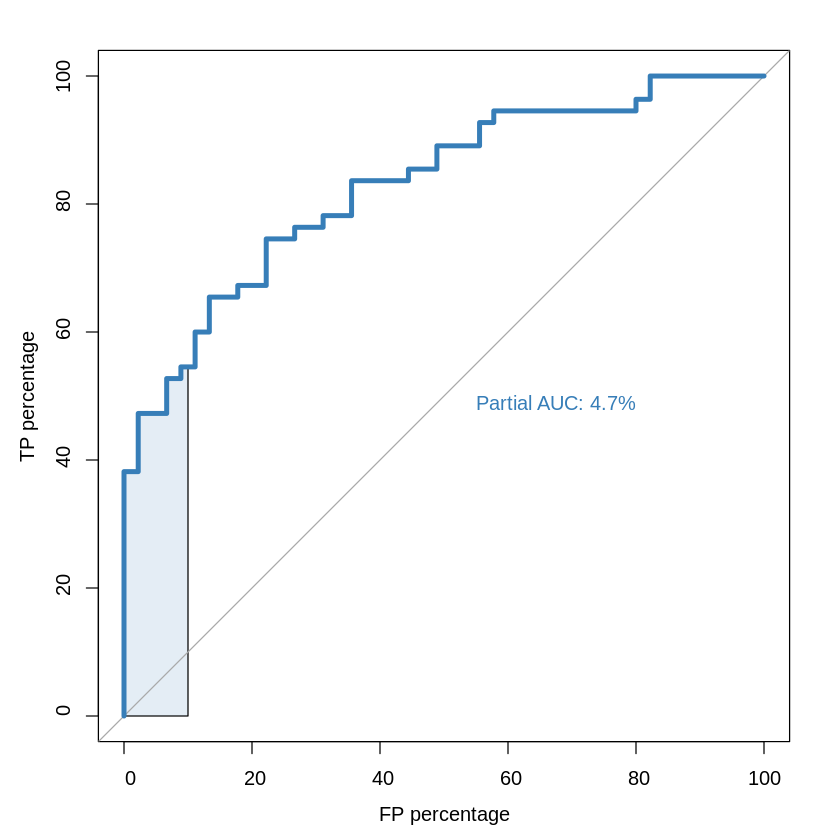

In [29]:
roc(obese, glm.fit$fitted.values, plot=TRUE, legacy.axes=TRUE,
   percent=TRUE, xlab='FP percentage', ylab='TP percentage',
   col='#377eb8', lwd=4, print.auc=TRUE, print.auc.x=45,
   partial.auc=c(100, 90), auc.polygon=TRUE,
    auc.polygon.col="#377eb822")

* Lastly, let's talk about how to overlap two **ROC** curves so that they are easy to compare.

* We'll start by making a **Random Forest** classifier with the same dataset.

In [0]:
rf.model <- randomForest(factor(obese) ~ weight)

* Now we draw the orginal **ROC** curve for the **Logistic Regression** then we add the **ROC** curve for the **Random Forest**.

* We do this using the `plot.roc()` function. Almost everything in the call is the same as in the call to the `roc()` function.
> However, since we're using a **Random Forest** for the second **ROC**, we pass in the number of threes in the forest that voted correctly. We also change the color to green. We also set `add=TRUE`, so that this **ROC** curve is added to an existing graph and we set `print.auc.y=40`, so that the **AUC** for the **Random Forest** is printed below the **AUC** for the **Logistic Regression**.

* Lastly, we draw a legend in the bottom right-hand corner.

Setting levels: control = 0, case = 1
Setting direction: controls < cases



Call:
roc.default(response = obese, predictor = glm.fit$fitted.values,     percent = TRUE, plot = TRUE, legacy.axes = TRUE, xlab = "FP percentage",     ylab = "TP percentage", col = "#377eb8", lwd = 4, print.auc = TRUE)

Data: glm.fit$fitted.values in 45 controls (obese 0) < 55 cases (obese 1).
Area under the curve: 82.91%

Setting levels: control = 0, case = 1
Setting direction: controls > cases


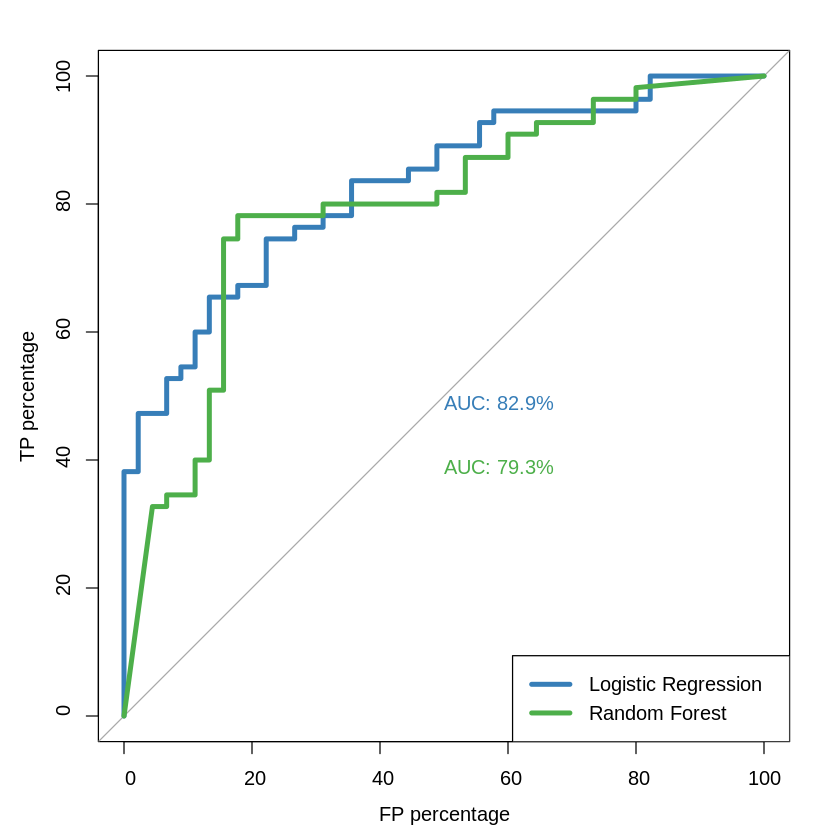

In [32]:
roc(obese, glm.fit$fitted.values, plot=TRUE, legacy.axes=TRUE,
   percent=TRUE, xlab='FP percentage', ylab='TP percentage',
   col='#377eb8', lwd=4, print.auc=TRUE)
plot.roc(obese, rf.model$votes[,1], percent=TRUE,
        col="#4daf4a", lwd=4, print.auc=TRUE, add=TRUE,
        print.auc.y=40)
legend("bottomright", legend=c("Logistic Regression", "Random Forest"),
      col=c("#377eb8", "#4daf4a"), lwd=4)

* For Rstudio: Once we're all done drawing **ROC** graphs, we need to reset the `pty` graphical parameter back to its default value (**m**, which is short for Maximum - as in "use the maximum amount of space provided to draw graphs")

In [0]:
# par(pty='m')